# Diccionario de Datos - Dataset Cáncer de Mama (Breast Cancer - Scikit-learn)

Este dataset contiene características computadas a partir de imágenes digitalizadas de masas mamarias, obtenidas mediante aspiración con aguja fina (FNA). Cada fila representa una muestra de tejido, con atributos numéricos y un diagnóstico como variable objetivo.

## Variable Objetivo

- **`target`**: Diagnóstico del tumor
  - `0` → Maligno
  - `1` → Benigno

---

## Variables Predictoras (Features)

Las siguientes variables están agrupadas en tres tipos de medidas: promedio (`mean`), error estándar (`error`) y peor valor observado (`worst`).

### Medidas promedio (`mean`)

- `mean radius` – Radio medio de los núcleos celulares
- `mean texture` – Textura media (granularidad)
- `mean perimeter` – Perímetro medio
- `mean area` – Área media
- `mean smoothness` – Suavidad media (variación local de intensidad)
- `mean compactness` – Compacidad media (perímetro² / área - 1)
- `mean concavity` – Concavidad media (gravedad de las depresiones en los contornos)
- `mean concave points` – Número medio de puntos cóncavos en el contorno
- `mean symmetry` – Simetría media
- `mean fractal dimension` – Dimensión fractal media (complejidad de los bordes)

---

### Error estándar (`error`)

- `radius error` – Error estándar del radio
- `texture error` – Error estándar de la textura
- `perimeter error` – Error estándar del perímetro
- `area error` – Error estándar del área
- `smoothness error` – Error estándar de la suavidad
- `compactness error` – Error estándar de la compacidad
- `concavity error` – Error estándar de la concavidad
- `concave points error` – Error estándar de los puntos cóncavos
- `symmetry error` – Error estándar de la simetría
- `fractal dimension error` – Error estándar de la dimensión fractal

---

### Peores valores (`worst`)

- `worst radius` – Valor máximo del radio observado
- `worst texture` – Valor máximo de textura
- `worst perimeter` – Valor máximo del perímetro
- `worst area` – Valor máximo del área
- `worst smoothness` – Valor máximo de suavidad
- `worst compactness` – Valor máximo de compacidad
- `worst concavity` – Valor máximo de concavidad
- `worst concave points` – Valor máximo de puntos cóncavos
- `worst symmetry` – Valor máximo de simetría
- `worst fractal dimension` – Valor máximo de dimensión fractal

---

## Total de columnas

- 30 columnas de entrada (features)
- 1 columna objetivo (`target`)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, roc_curve

In [3]:
# 1. Cargar dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target")

In [4]:
# 2. Particion 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# 3. Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 4. Definir modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [7]:
# 5. K-Fold con metricas de recall
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
recall_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='recall')
    recall_scores[name] = scores
    print(f"{name} - Recall por fold:", scores)
    print(f"{name} - Recall promedio:", np.mean(scores))


Logistic Regression - Recall por fold: [0.98181818 0.93650794 1.         1.         0.98181818]
Logistic Regression - Recall promedio: 0.9800288600288599
Random Forest - Recall por fold: [0.98181818 0.95238095 0.97916667 1.         0.90909091]
Random Forest - Recall promedio: 0.9644913419913419


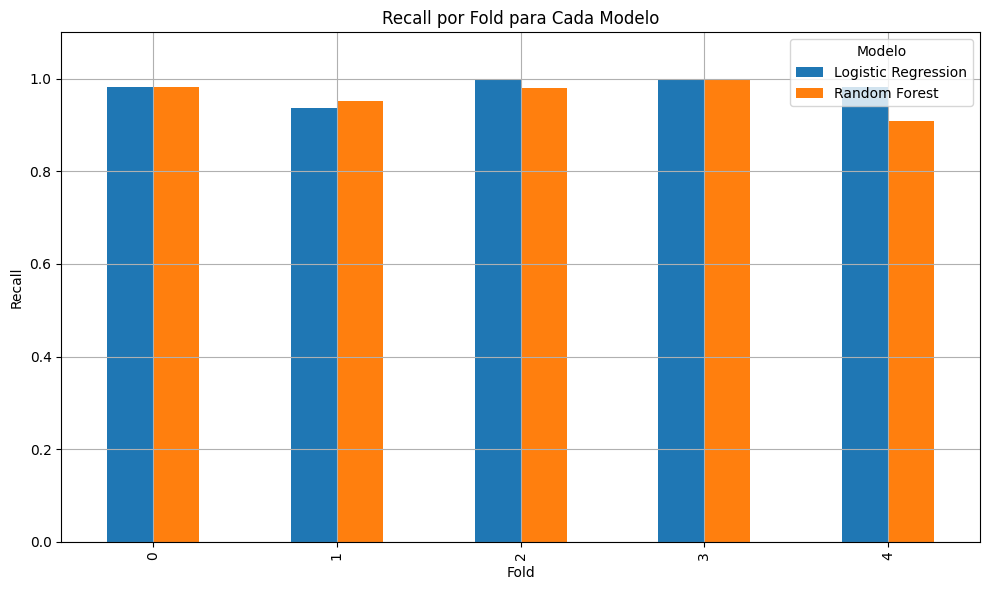

In [8]:
# 6. Grafica de barras
recall_df = pd.DataFrame(recall_scores)
recall_df.plot(kind='bar', figsize=(10,6))
plt.title("Recall por Fold para Cada Modelo")
plt.xlabel("Fold")
plt.ylabel("Recall")
plt.ylim(0,1.1)
plt.legend(title="Modelo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# 7. Entrenamiento final y evaluación en test
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_scaled, y_train)
y_pred = final_model.predict(X_test_scaled)
y_proba = final_model.predict_proba(X_test_scaled)[:,1]

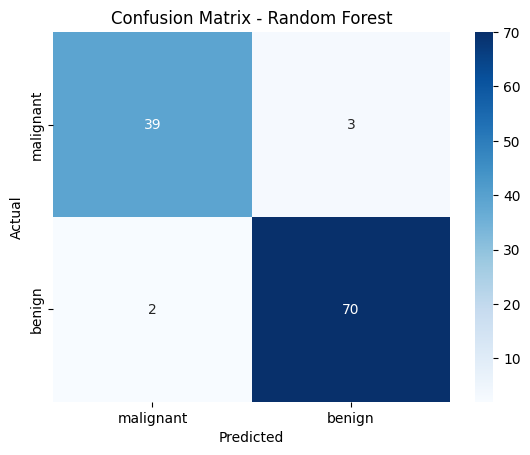

In [10]:
# 8. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [11]:
# 9. Métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))
print("Recall en test:", recall_score(y_test, y_pred))
print("AUC en test:", roc_auc_score(y_test, y_proba))



Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Recall en test: 0.9722222222222222
AUC en test: 0.9938822751322751


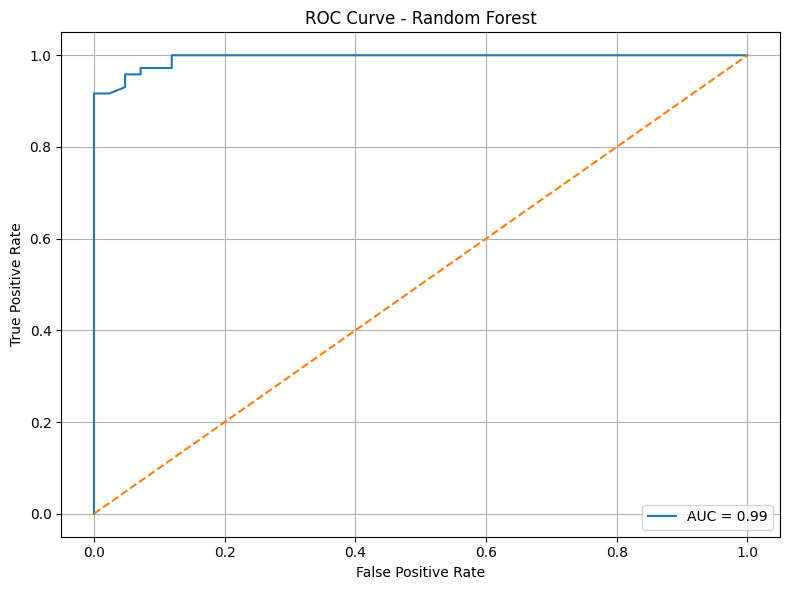

In [12]:
# 10. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
